In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dark_horse = cv2.imread('course/DATA/horse.jpg')
show_horse = cv2.cvtColor(dark_horse, cv2.COLOR_BGR2RGB)

rainbow = cv2.imread('course/DATA/rainbow.jpg')
show_rainbow = cv2.cvtColor(rainbow, cv2.COLOR_BGR2RGB)

blue_bricks = cv2.imread('course/DATA/bricks.jpg')
show_bricks = cv2.cvtColor(blue_bricks, cv2.COLOR_BGR2RGB)

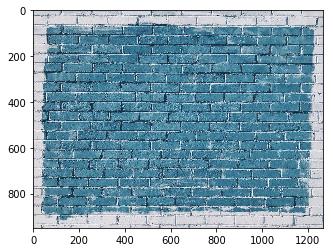

In [3]:
plt.imshow(show_bricks)

In [4]:
hist_values = cv2.calcHist([blue_bricks], channels=[0], mask=None, histSize=[256], ranges=[0, 256])

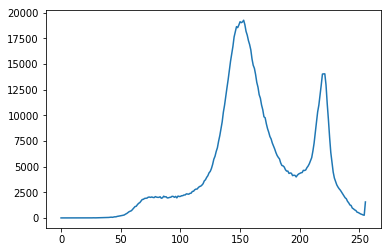

In [5]:
plt.plot(hist_values)

Text(0.5,1,'Histogram for Blue Bricks')

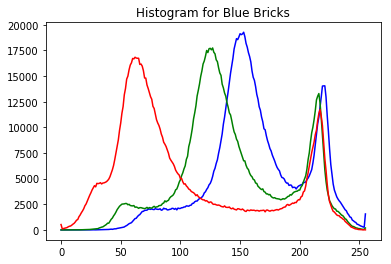

In [6]:
colors = ('b', 'g', 'r')

for i, color in enumerate(colors):
    hist_values = cv2.calcHist([blue_bricks], channels=[i], mask=None, histSize=[256], ranges=[0, 256])
    plt.plot(hist_values, color=color)
    
plt.title('Histogram for Blue Bricks')

Text(0.5,1,'Histogram for Rainbow')

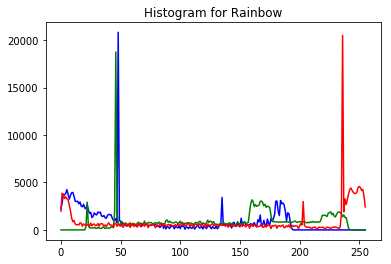

In [7]:
for i, color in enumerate(colors):
    hist_values = cv2.calcHist([rainbow], channels=[i], mask=None, histSize=[256], ranges=[0, 256])
    plt.plot(hist_values, color=color)
    
plt.title('Histogram for Rainbow')

Text(0.5,1,'Histogram for Dark Horse')

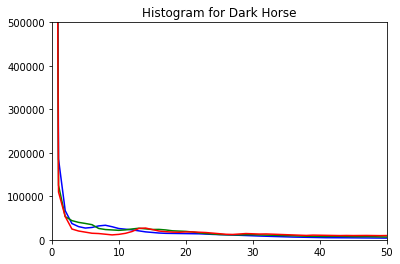

In [8]:
for i, color in enumerate(colors):
    hist_values = cv2.calcHist([dark_horse], channels=[i], mask=None, histSize=[256], ranges=[0, 256])
    plt.xlim(0, 50)
    plt.ylim(0, 500000)
    plt.plot(hist_values, color=color)
    
plt.title('Histogram for Dark Horse')

### Masking

In [9]:
black_bg = np.zeros(rainbow.shape[:2], dtype=np.uint8)

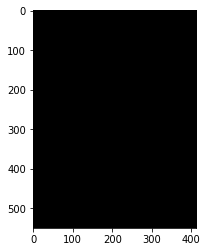

In [10]:
plt.imshow(black_bg, cmap='gray')

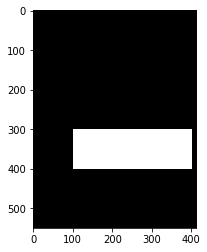

In [11]:
black_bg[300:400,100:400] = 255

plt.imshow(black_bg, cmap='gray')

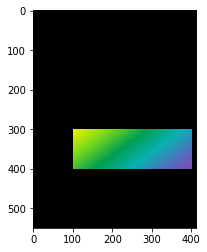

In [12]:
masked_img = cv2.bitwise_and(rainbow, rainbow, mask=black_bg)

show_masked_img = cv2.bitwise_and(show_rainbow, show_rainbow, mask=black_bg)

plt.imshow(show_masked_img)

Text(0.5,1,'Masked image')

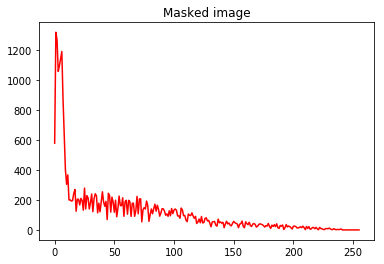

In [13]:
hist_values = cv2.calcHist([masked_img], channels=[2], mask=black_bg, histSize=[256], ranges=[0, 256])

plt.plot(hist_values, color='red')

plt.title('Masked image')

Text(0.5,1,'Normal image')

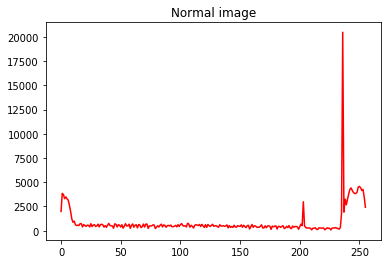

In [14]:
hist_values = cv2.calcHist([rainbow], channels=[2], mask=None, histSize=[256], ranges=[0, 256])

plt.plot(hist_values, color='red')

plt.title('Normal image')

#### Grayscale image

In [15]:
gorilla = cv2.imread('course/DATA/gorilla.jpg', 0)

In [16]:
def display_img(img):
    fig = plt.figure(figsize=(12, 10))
    ax = fig.add_subplot(111)
    ax.imshow(img, cmap='gray')

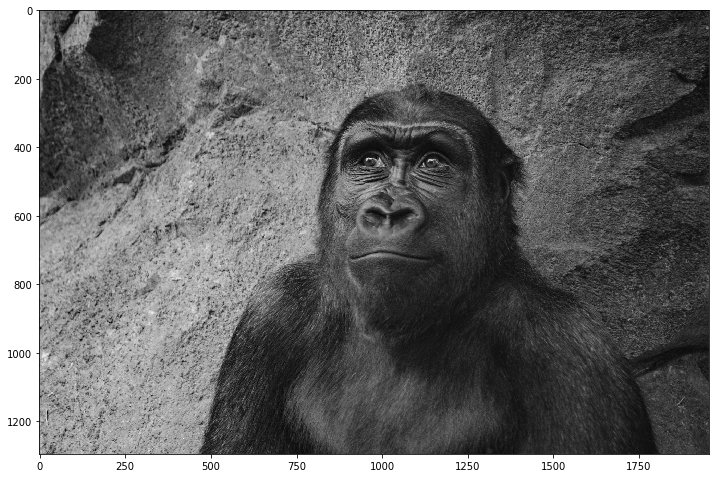

In [17]:
display_img(gorilla)

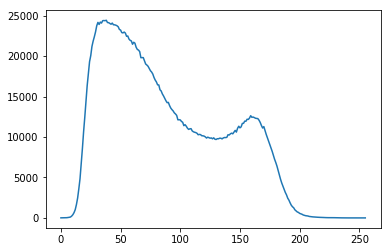

In [18]:
hist_values = cv2.calcHist([gorilla], channels=[0], mask=None, histSize=[256], ranges=[0, 256])

plt.plot(hist_values)

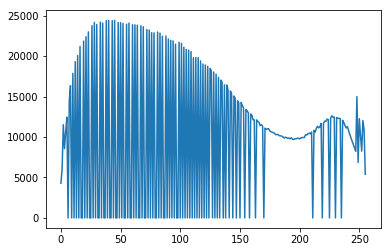

In [19]:
equalized_gorilla = cv2.equalizeHist(gorilla)

hist_values = cv2.calcHist([equalized_gorilla], channels=[0], mask=None, histSize=[256], ranges=[0, 256])

plt.plot(hist_values)

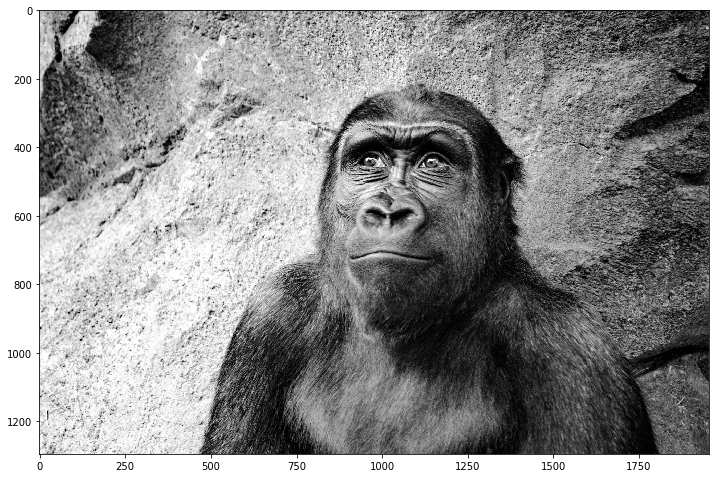

In [20]:
display_img(equalized_gorilla)

#### Color image

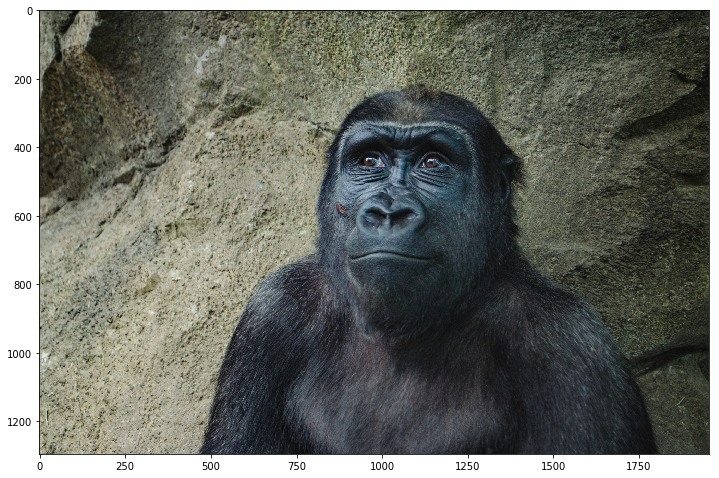

In [21]:
color_gorilla = cv2.imread('course/DATA/gorilla.jpg')

show_color_gorilla = cv2.cvtColor(color_gorilla, cv2.COLOR_BGR2RGB)

display_img(show_color_gorilla)

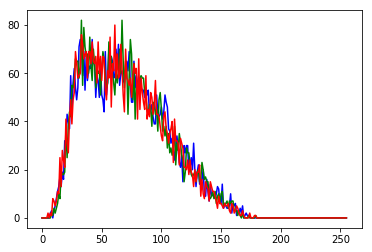

In [22]:
for i, color in enumerate(colors):
    hist_values = cv2.calcHist(color_gorilla, channels=[i], mask=None, histSize=[256], ranges=[0, 256])
    plt.plot(hist_values, color=color)

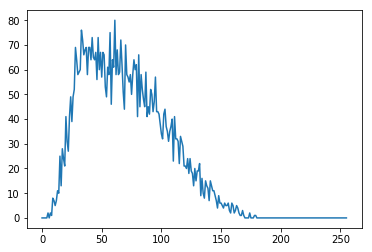

In [23]:
hist_values = cv2.calcHist(color_gorilla, channels=[2], mask=None, histSize=[256], ranges=[0, 256])
plt.plot(hist_values)

In [24]:
hsv_gorilla = cv2.cvtColor(color_gorilla, cv2.COLOR_BGR2HSV)

print(hsv_gorilla.shape)
print(hsv_gorilla[:,:,2].max(), hsv_gorilla[:,:,2].min())
print(hsv_gorilla[:,:,1].max(), hsv_gorilla[:,:,1].min())
print(hsv_gorilla[:,:,0].max(), hsv_gorilla[:,:,0].min())

(1295, 1955, 3)
255 0
255 0
179 0


In [25]:
hsv_gorilla[:,:,2] = cv2.equalizeHist(hsv_gorilla[:,:,2])

equalized_color_gorilla = cv2.cvtColor(hsv_gorilla, cv2.COLOR_HSV2BGR)
show_equalized_color_gorilla = cv2.cvtColor(hsv_gorilla, cv2.COLOR_HSV2RGB)

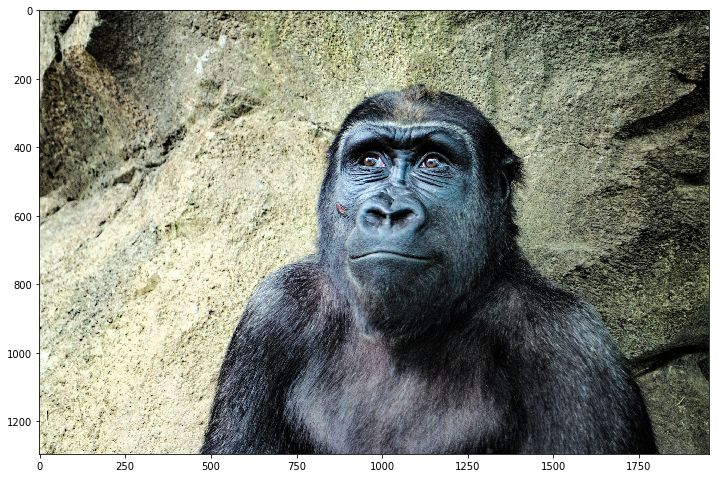

In [26]:
display_img(show_equalized_color_gorilla)

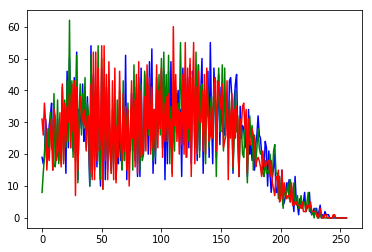

In [27]:
for i, color in enumerate(colors):
    hist_values = cv2.calcHist(equalized_color_gorilla, channels=[i], mask=None, histSize=[256], ranges=[0, 256])
    plt.plot(hist_values, color=color)

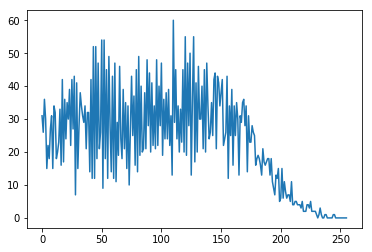

In [28]:
hist_values = cv2.calcHist(equalized_color_gorilla, channels=[2], mask=None, histSize=[256], ranges=[0, 256])
plt.plot(hist_values)